# The Sparks Foundation : Data Science and Business Analytics Internship




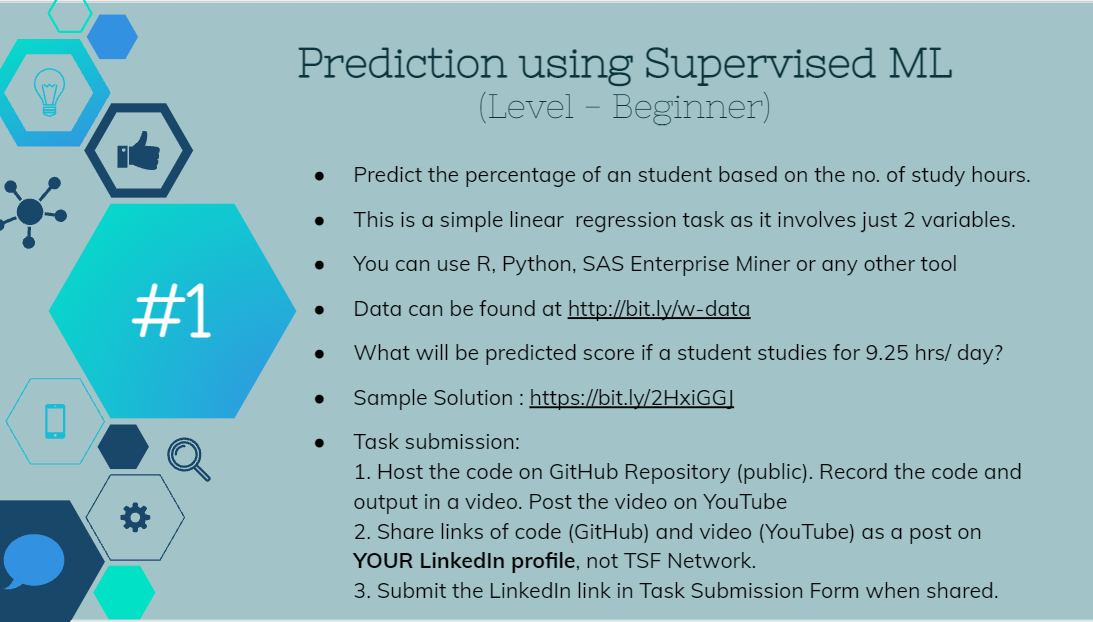

#### Task      :   1
#### Name      :   Joel Bharat Monis
#### IDE       :   Google Colab
#### Language  :   Python 3
#### Ex        :   Linear Regression

## 1. Initial action


*   Load the libraries
*   Import the dataset



In [2]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("The student data is as given below : ")
data

The student data is as given below : 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 2.  Check the data


*   Analyse the data
*   Visualise the data (In this case since the data is quite straightforward. If the data was any more complicated, EDA would have been done in a separate section)



In [4]:
## Find out its shape
data.shape

(25, 2)

##### It has 25 rows and 2 columns

In [5]:
## Check the Vital statistics of the data :)
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
## check for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### There are no null values

In [7]:
## Check for duplicate values
data.duplicated().sum()

0

##### There are no duplicate values

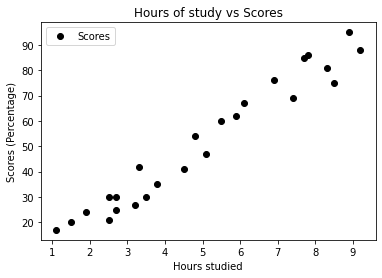

In [8]:
## Visualising the spread of data
data.plot(x="Hours", y="Scores", style="ko")
plt.title("Hours of study vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores (Percentage)")
plt.show()

##### It's pretty clear from the graph, that there is a strong positive linear relationship betwenn Hours and Scores. It is a plum case for regression.

# 3. Prepare the data.

In [9]:
##### Extract the data into X and y i.e. dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [10]:
##### Examine the data extracted : Independent data
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [11]:
##### Examine the data extracted : Dependent data
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# 4. Model the data.

*   Split the data in test and train sets.
*   Build the model 
*   Check the accuracy of the model






In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234321)

In [13]:
##### See the train dataset
print("X_train \n", X_train)
print("y_train \n", y_train)

X_train 
 [[4.5]
 [9.2]
 [7.8]
 [5.1]
 [7.4]
 [2.5]
 [1.9]
 [3.2]
 [3.5]
 [5.9]
 [6.1]
 [8.5]
 [8.9]
 [3.3]
 [1.5]
 [4.8]
 [2.7]]
y_train 
 [41 88 86 47 69 30 24 27 30 62 67 75 95 42 20 54 25]


In [14]:
##### See the test dataset
print("X_test \n", X_test)
print("y_test \n", y_test)

X_test 
 [[3.8]
 [5.5]
 [1.1]
 [2.5]
 [2.7]
 [8.3]
 [6.9]
 [7.7]]
y_test 
 [35 60 17 21 30 81 76 85]


In [15]:
##### Build the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

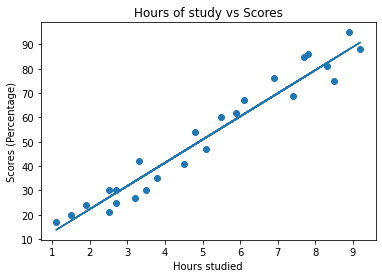

In [16]:
##### Construct and plot the regression line
line=regressor.intercept_ + regressor.coef_*X
plt.scatter(X,y)
plt.plot(X, line)
plt.title("Hours of study vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores (Percentage)")
plt.show()

In [17]:
##### Predict the test values and compare with the actual values
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,35,39.453278
1,60,55.633470
2,17,13.755326
3,21,27.080190
4,30,28.983742
5,81,82.283198
6,76,68.958334
7,85,76.572542


In [18]:
##### Check the Mean Absolute Error and Mean Squared Error
from sklearn import metrics
print("The Mean Absolute Error is ", metrics.mean_absolute_error(y_test, y_pred))
print("The Mean Squared Error is ", metrics.mean_squared_error(y_test, y_pred))

The Mean Absolute Error is  4.489156481460251
The Mean Squared Error is  26.210170576567997


# 5. Predict the score for the given test value

In [26]:
print("The score for the student who studied 9.25 hrs a day is {:.2f}".format(float(regressor.predict([[9.25]]))))

The score for the student who studied 9.25 hrs a day is 91.33
